# Clustering-Hierarchical Clustering.

### Contents.
1. Introduction
1. Understanding a dendrogram and the agglomerative approach.
    1. Identifying the clusters based on the dendrogram.
1. Hierarchical Algorithm.
1. Defining the Dissimilarity measure between two points.
1. Choosing the Disimilarity Measure.

## Introduction.

As seen in my earlier [post](https://github.com/GeorgeOduor/unsupervised-learning/blob/master/k-means%20clustering/CLUSTERING.ipynb) and [project](https://github.com/GeorgeOduor/unsupervised-learning/blob/master/k-means%20clustering/kmeans.ipynb) on k-means clustering,the k value for number of clusters have to be specified earlier.This property is not required in hierarchical clustering.

This particular type of clustering method creates a tree based representation of observations called a _dendrogram_.

Hierarchical clustering algorithms build a hierachy of clusters where each node is a cluster consists of the clusters of its daughter nodes.

Hierachical clustering strategies generaly fall into teo types:
1. Divisive (_Top down approach_)

Start with all observations and break it down into smaller pieces.

1. Agglomerative(_Bottom up approach_)

Each observations starts the cluster and pair up as they move the hierachy.Agglomeration simply means to collect things.Agglomerative approach is very popular and works in a similar way which humans think.

## Understanding a dendrogram and the agglomerative approach.

So how does it work?

This method builds a hierachy from individual elements by progressively merging clusters.

In a dendrogram,each leaf represents one of the datapoints.As we move up the tree some observations fuse together to form branches.These observations that fuse together are very similar to each other or _close_ to one another.Further up the tree ,branchesf fuse with other other branches or observations.

The height of the fusions indicates how the two observations or clusters are different.Let me plot a simple plot of face data here to see how this comes about.

In [19]:
#this code is here to help me hide some cells input
from IPython.display import HTML
import random

def hide_toggle(for_next=False):
    this_cell = """$('div.cell.code_cell.rendered.selected')"""
    next_cell = this_cell + '.next()'

    toggle_text = 'Toggle show/hide'  # text shown on toggle link
    target_cell = this_cell  # target cell to control with toggle
    js_hide_current = ''  # bit of JS to permanently hide code in current cell (only when toggling next cell)

    if for_next:
        target_cell = next_cell
        toggle_text += ' next cell'
        js_hide_current = this_cell + '.find("div.input").hide();'

    js_f_name = 'code_toggle_{}'.format(str(random.randint(1,2**64)))

    html = """
        <script>
            function {f_name}() {{
                {cell_selector}.find('div.input').toggle();
            }}

            {js_hide_current}
        </script>

        <a href="javascript:{f_name}()">{toggle_text}</a>
    """.format(
        f_name=js_f_name,
        cell_selector=target_cell,
        js_hide_current=js_hide_current, 
        toggle_text=toggle_text
    )

    return HTML(html)

hide_toggle()

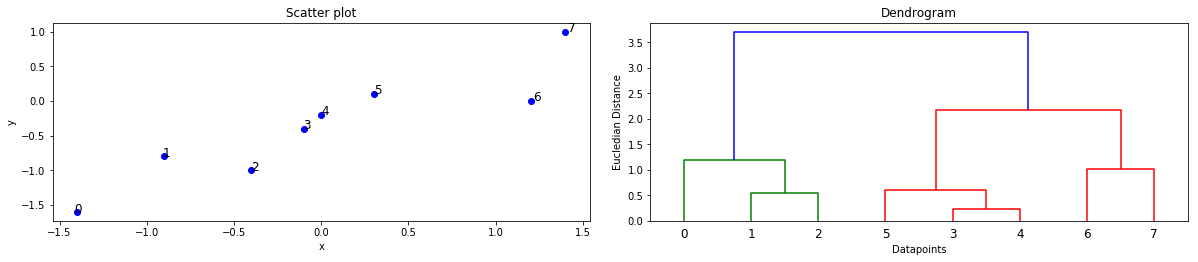

In [67]:


import seaborn as sns
import matplotlib.pyplot as plt
import scipy.cluster.hierarchy as sch
import pandas as pd

points1 = [[3,9],[4,8],[5,4]]
points = pd.DataFrame({"x":[-1.4,-0.9,-0.4,-0.1,0,0.3,1.2,1.4],
                  "y":[-1.6,-0.8,-1,-.4,-.2,.1,0,1]}).values
plt.figure(figsize=(17,4))
plt.subplot(1,2,1)
for i in range(len(points)):
    x = points[i][0]
    y = points[i][1]
    axes[1]=plt.plot(x, y, 'bo')
    plt.text(x * (1 + 0.01), y * (1 + 0.01) , i, fontsize=12)
plt.title("Scatter plot")
plt.xlabel("x")
plt.ylabel("y")

plt.subplot(1,2,2)
axes[0] =dendrogram = sch.dendrogram(sch.linkage(df.values,method='ward'))
plt.title("Dendrogram")
plt.xlabel("Datapoints")
plt.ylabel("Eucledian Distance")
plt.tight_layout(pad=2)
plt.show()
hide_toggle()


In the plot to the left ,we can see the points ploted in a 2D scater plot and a dendrogram of the same is done in second plot.
Lets understand how the program makes the dendrogram in the right figure.Assume the points represents cities in a country and we want to cluster them based on their distance from each other.Distance between the ponits can be calculated by many methods inclusing eucledian distance.Looking at the scatter plot on the left side points 3 and 4 are the clossest therefore they will be fused together and they will form a cluster.This leaves us with $n-1=7$ clusters.The distance between them is represented by the height of the cluster formed.

By checking the distance between the points 1 and 2 relative to other points we find they are the closest so we will make a cluster with them.Using the first cluster between 3 and 4 we can see that its closser to five than the cluster between 1 and 2 so so we will fuse this cluster with point 5.

This process continues progressively up the tree to make the dendrogram.

### Identifying the clusters based on the dendrogram.

So how do we identify the clusters based on this dendrogram?To get the optimal number of clusters,the dendrogram is cut at a point where the vertical lines are highest and not crossing any horizontal line.

## Hierarchical Algorithm.

After Understanding the concept ,lets see the algorithm on how to build this in a simple and easy to unsderstand steps.

1. Make each datpoint a single point cluster;froms N clusters
1. Take two clossest datapoints and make them one cluster;forms N-1 clusters.
1. Take the two closest clusters and make them one cluster;forms N-2 Clusters
1. Repeat step 3 until there is one one cluster remaining.


## Defining the Dissimilarity measure between two points.

A question arises on how we chose which cluster to be fused with which.In simple terms how did we decide on the dissimilarity between two clusters.

This problem is easily solved by the concept of linkage which defines the dissimilarity between two groups of observations.
There are 4 main types of linkages namely:

1. **Complete linkage**:takes the largest of the dissimilarities between the observations in two clusters after computing all pairwise dissimilarities.
1. **Average linkage**:takes the average of the dissimilarities between the observations in two clusters after computing all pairwise dissimilarities.
1. **Single linkage**:takes the smallest of the dissimilarities between the observations in two clustersafter computing all pairwise dissimilarities.
1. **Centroid linkage**:takes the dissimilarity between the centroid of cluster A and centroid of cluster B

## Choosing the Disimilarity Measure.

Choosing the dissimilarity measure in this algorithm depends on the domain knowledge of what one is doing.

Feature scalling is recomended in order to take care of outliers in the dataset.

The two decisions above are very fragile and should be made with great care as they greatly affect the result of the model.

## Projects associated with Hierachical clustering.

Please click below to see my project in python associated with this method.
1. [__Python__]()
1. [__R__]()